# Compare the LSST magnitudes I calculate to those from TRILEGAL

Should I use Kurucz atmospheres?

https://www.hs.uni-hamburg.de/DE/Ins/Per/Czesla/PyA/PyA/pyaslDoc/resBasedDoc/kuruczModels.html

https://pysynphot.readthedocs.io/en/latest/spectrum.html

In [115]:
import sys
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code')
from EBLSST import LSSTEBworker, SED
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib notebook

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


*Read in a TRILEGAL field*

In [43]:
filename = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/TRILEGAL/grid/trilegal.grid.id1.0.h5'
df = pd.read_hdf(filename)
#dist = 10.**(df['m-M0'].values/5.) * 10.# *u.parsec

logDist = np.log10( 10.**(df['m-M0'].values/5.) *10. / 1000.) #log(d [kpc])
logR = 2.*(0.25*df['logL'] - df['logTe'] + 3.762) #taken from my N-body notes to get logT <-- from Jarrod Hurley

df['logR'] = logR
df['logDist'] = logDist

dfmags = df[['u_mag','g_mag','r_mag','i_mag','z_mag','Y_mag']]
print(df)

        Gc  logAge  [M/H]     m_ini   logL  logTe   logg  m-M0     Av  m2/m1  \
0        1    6.65   0.27   0.51311 -1.374  3.592  4.837   7.2  0.347    0.0   
1        1    6.71  -0.19   0.13318 -1.740  3.509  4.285   8.0  0.458    0.0   
2        1    6.71  -0.09   0.74550 -0.736  3.671  4.676   8.2  0.371    0.0   
3        1    6.87  -0.07   1.62066  0.870  3.896  4.307   9.7  0.568    0.0   
4        1    6.87   0.07   0.74828 -0.767  3.661  4.668   8.8  0.431    0.0   
5        1    6.87   0.27   1.31862  0.403  3.806  4.326  12.8  0.432    0.0   
6        1    7.07   0.23   0.11043 -1.914  3.482  4.269   4.4  0.112    0.0   
7        1    7.15  -0.17   0.78918 -0.596  3.693  4.650   7.6  0.372    0.0   
8        1    7.15  -0.09   0.80570 -0.582  3.693  4.642  10.3  0.457    0.0   
9        1    7.17   0.13  14.01946  4.484  4.395  3.626   9.3  0.483    0.0   
10       1    7.21   0.17   0.22026 -2.181  3.536  5.052   7.1  0.346    0.0   
11       1    7.25   0.01   0.35666 -1.7

*Create an EB in my code*

In [123]:
worker = LSSTEBworker()
worker.filterFilesRoot = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/filters/'
worker.initialize()

diff = {}
diff['mbol'] = []
diff['Teff'] = []
diff['u'] = []
diff['g'] = []
diff['r'] = []
diff['i'] = []
diff['z'] = []
diff['y'] = []
for i in range(100):
    print(i)
    L1 = 10.**df['logL'][i]
    L2 = 1e-20
    r1 = 10.**df['logR'][i]
    r2 = 1e-20
    dist = 10.**df['logDist'][i]
    Av = df['Av'][i]
    line = [1., 1., 1., 0., r1, r2, L1, L2, 1., 1., 1., dist, 0., 0., Av]
    EB = worker.getEB(line, i)

#     print(EB.T1, 10.**df['logTe'][i])
#     print(EB.Mbol, df['mbol'][i] - df['m-M0'][i])

#     print(EB.appMagMean)
#     print(dfmags.iloc[i])
    
    diff['mbol'].append(EB.Mbol)
    diff['Teff'].append(EB.T1)
    diff['u'].append(dfmags.iloc[i]['u_mag'] - EB.appMagMean['u_'])
    diff['g'].append(dfmags.iloc[i]['g_mag'] - EB.appMagMean['g_'])
    diff['r'].append(dfmags.iloc[i]['r_mag'] - EB.appMagMean['r_'])
    diff['i'].append(dfmags.iloc[i]['i_mag'] - EB.appMagMean['i_'])
    diff['z'].append(dfmags.iloc[i]['z_mag'] - EB.appMagMean['z_'])
    diff['y'].append(dfmags.iloc[i]['Y_mag'] - EB.appMagMean['y_'])

# print('')
# print(EB.absMagMean)
# print(dfmags.iloc[i]['u_mag'] - EB.absMagMean['u_'])
# print(dfmags.iloc[i]['g_mag'] - EB.absMagMean['g_'])
# print(dfmags.iloc[i]['r_mag'] - EB.absMagMean['r_'])
# print(dfmags.iloc[i]['i_mag'] - EB.absMagMean['i_'])
# print(dfmags.iloc[i]['z_mag'] - EB.absMagMean['z_'])
# print(dfmags.iloc[i]['Y_mag'] - EB.absMagMean['y_'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


<IPython.core.display.Javascript object>


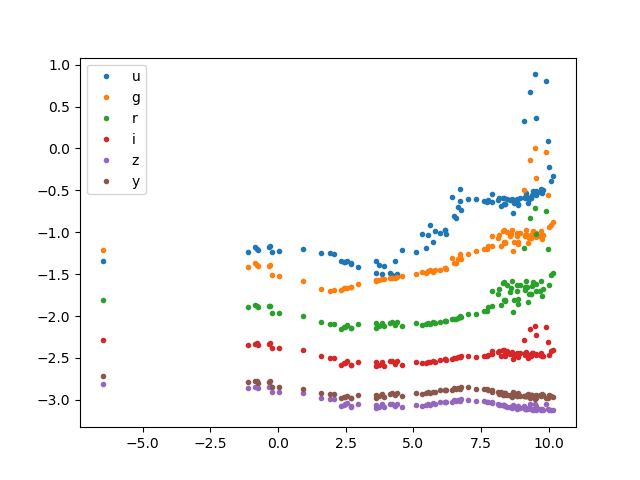

<IPython.core.display.Javascript object>


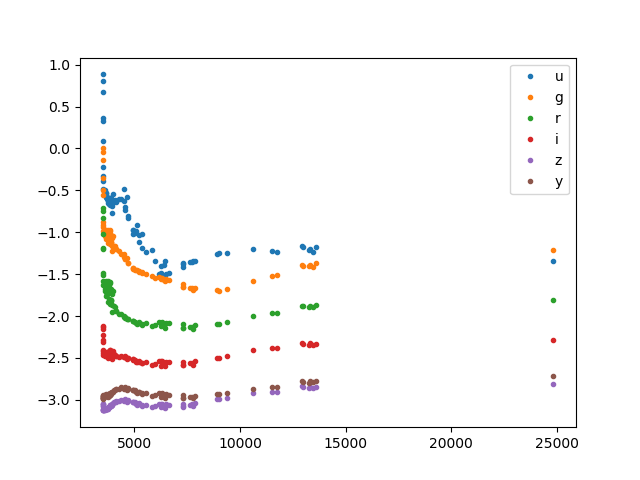

In [124]:
f, ax = plt.subplots()
ax.plot(diff['mbol'], diff['u'],'.', label='u')
ax.plot(diff['mbol'], diff['g'],'.', label='g')
ax.plot(diff['mbol'], diff['r'],'.', label='r')
ax.plot(diff['mbol'], diff['i'],'.', label='i')
ax.plot(diff['mbol'], diff['z'],'.', label='z')
ax.plot(diff['mbol'], diff['y'],'.', label='y')
ax.legend()

f, ax = plt.subplots()
ax.plot(diff['Teff'], diff['u'],'.', label='u')
ax.plot(diff['Teff'], diff['g'],'.', label='g')
ax.plot(diff['Teff'], diff['r'],'.', label='r')
ax.plot(diff['Teff'], diff['i'],'.', label='i')
ax.plot(diff['Teff'], diff['z'],'.', label='z')
ax.plot(diff['Teff'], diff['y'],'.', label='y')
ax.legend()